# TSF GRIPNOV21 Task-1
# Prediction using Supervised ML
## Author : Uddeshya Sharma

### Collecting and viewing the dataset

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\hp\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#Importing the dataset
url = "http://bit.ly/w-data"
data_df = pd.read_csv(url)

In [3]:
#To display top 5 entries
data_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting the dataset on 2-D graphs to find some manual relationship between the houres studied and scores obtained

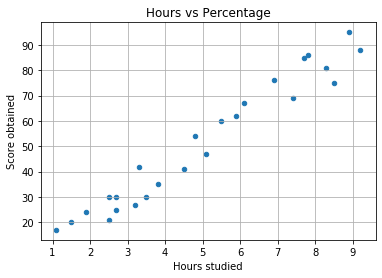

In [4]:
#Plotting the scatter plot to view the distribution of scores using matplotlib
data_df.plot(x = "Hours", y = "Scores", kind = 'scatter')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours studied')  
plt.ylabel('Score obtained')
plt.grid()
plt.show()

Here we can see that the graph is somewhat evenly discributed linearly, i.e. as the hours of study increase the scores obtained tend to increase as well

### Preparing the data for model for learning 

In [5]:
x_features = data_df.iloc[:, :-1].values  
y_targets = data_df.iloc[:, 1].values  

We have allocated the features and targets, now we will split the dataset into training and testing sets using sklearn train_test_split() function.

In [6]:
#Importing sklearn library for learning
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_features, y_targets, random_state=1) 

### Training and fitting the algorithm 

In [7]:
from sklearn import set_config
set_config(print_changed_only = False)
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

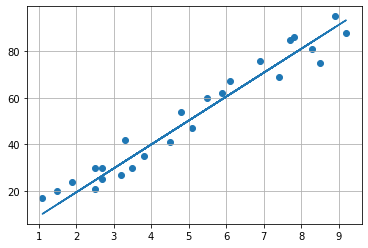

In [8]:
# Plotting the regression line
line = regr.coef_*x_features+regr.intercept_

# Plotting for the test data
plt.scatter(x_features, y_targets)
plt.plot(x_features, line);
plt.grid()
plt.show()

### Testing the model using test dataset and making predictions


In [9]:
#To view the test dataset
print(x_test)
#For predicting using the model we created
y_pred = regr.predict(x_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]]


In [10]:
# Comparing Actual vs Predicted results
df_result = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df_result 

,Actual Score,Predicted Score
0,17,10.151901
1,42,32.739761
2,24,18.365669
3,75,86.129249
4,54,48.140575
5,85,77.915481
6,67,61.487947


### Evaluating the performance of the model

We are checking the correctness of our model using metrics for sklearn library. Here I have chosen r2_score.

In [11]:
#Importing accuracy_score from sklearn
from sklearn.metrics import r2_score
print("R-squared score of our model is ",r2_score(y_test, y_pred))

R-squared score of our model is  0.8980888932690286


The R-squared score should be between 0 and 1, 0 indicates that the responsible variable cannot be explained by the predictor variable at all, whereas 1 indicates that the responsible variable can be perfectle explained by the predictor variable without error.
Here, we got a score of 0.89 which is quite decent.

## *******End of the task*******